# DL Assignment 3: Part 3

**Q10:**

Using the following formulas and parameters we can work out the output dimensions as follows:

$
n_{H|W}^{[l]} = \frac{n_{H|W}^{[l-1]} + 2p^{[l-1]}-f^{[l-1]}}{s^{[l-1]}} + 1
$

$
n_{H}^{[l-1]} = 768, n_{W}^{[l-1]} = 1024, p = 1, s = 2, k = 5 \times 5
$

$
n_{H}^{[l]} = 383.5, n_{W}^{[l]} = 511.5
$

When the kernel size does not fit an even amount of times in an input dimension, the dimension in question is floored (https://discuss.pytorch.org/t/how-to-keep-output-size-identic-with-input-size/84025), which means that the output heights and widths will turn out to be 383 and 511 pixels respectively. Applying convolution with the aforementioned settings will thus lead to output tensor $Y \in \mathbb{R}^{16 \times 511 \times 383}$.

We can apply the same calculations to an input image tensor $X \in \mathbb{R}^{8 \times 1920 \times 1080}$ to get an output tensor $Y \in \mathbb{R}^{16 \times 959 \times 539}$

**Q11:**

Input tensor: $X \in \mathbb{R}^{16 \times 3 \times 32 \times 32}$
```
X = torch.randn(16,3,32,32)
```

Global max pool: ``` X_maxpool = X.max([2,3]) ```


Global mean pool: ``` X_meanpool = X.mean([2,3]) ```

**Q12:**



In [6]:
# Extract dataset (perform only once! -> 280 MB file)
# Make sure MNIST data (.tgz file) is in current directory
import tarfile
import os

with tarfile.open("mnist-varres.tgz", "r:gz") as tar:
    tar.extractall()

In [63]:
# Define custom dataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt
import PIL

IMG_TRANSFORM = transforms.Compose([
    transforms.Grayscale(), # Reduce to one channel (grayscale image)
    transforms.Resize((32,32)),
    transforms.ToTensor()
])

BATCH_SIZE = 16

train_data = torchvision.datasets.ImageFolder(root = "mnist-varres/train",
                                             transform = IMG_TRANSFORM)
test_data = torchvision.datasets.ImageFolder(root = "mnist-varres/test",
                                            transform = IMG_TRANSFORM)
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = True)

In [64]:
data, _ = next(iter(train_loader))

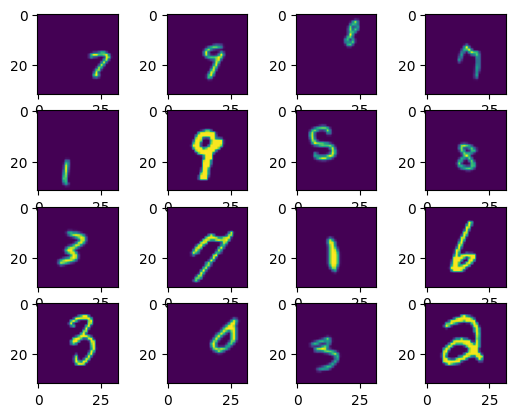

In [67]:
fig, axs = plt.subplots(4, 4)
it = 0
for i in range(4):
    for j in range(4):
        axs[i][j].imshow(data[it][0])
        it += 1